In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('./perrin-freres-monthly-champagne-.csv')
df.dropna(inplace=True)
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.index.freq = 'MS'
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [121]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [122]:
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


# Visualising Data

<Axes: xlabel='Month'>

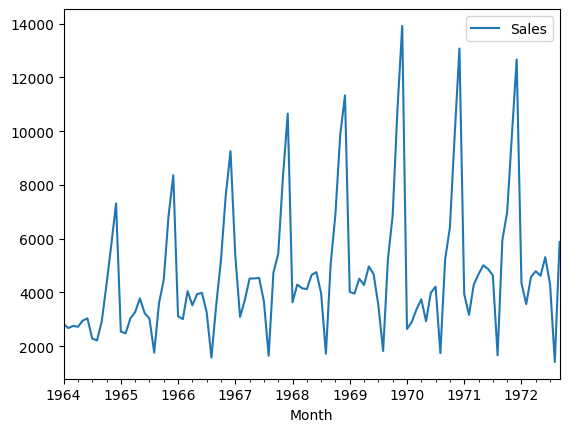

In [123]:
df.plot()

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
test_result = adfuller(df['Sales'])

In [126]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', 'nlagsUsed', 'numObservations']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis(H1), Time Series has a unit root, indicating it is non-stationary")

In [127]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
nlagsUsed : 11
numObservations : 93
Weak evidence against the null hypothesis(H1), Time Series has a unit root, indicating it is non-stationary


# Differencing

In [128]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [129]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [130]:
df['Sales First Difference 12'] = df['Sales'] - df['Sales'].shift(12)

In [131]:
df.head(15)

,Sales,Sales First Difference,Sales First Difference 12
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


<Axes: xlabel='Month'>

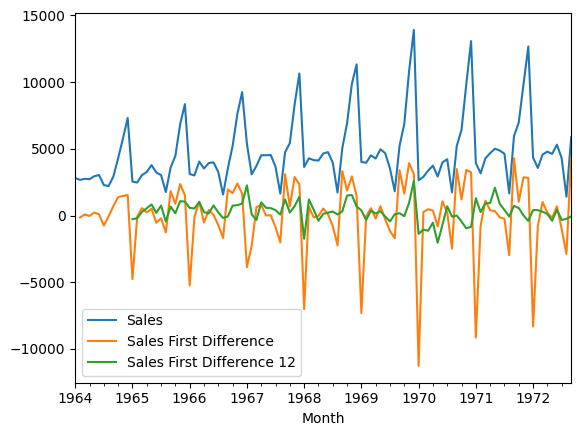

In [132]:
df.plot()

In [133]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448051006
p-value : 2.51962044738698e-10
nlagsUsed : 11
numObservations : 92
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


In [134]:
adfuller_test(df['Sales First Difference 12'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
nlagsUsed : 0
numObservations : 92
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

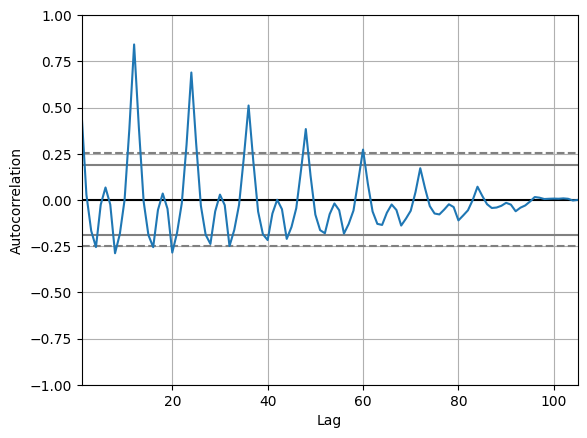

In [135]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

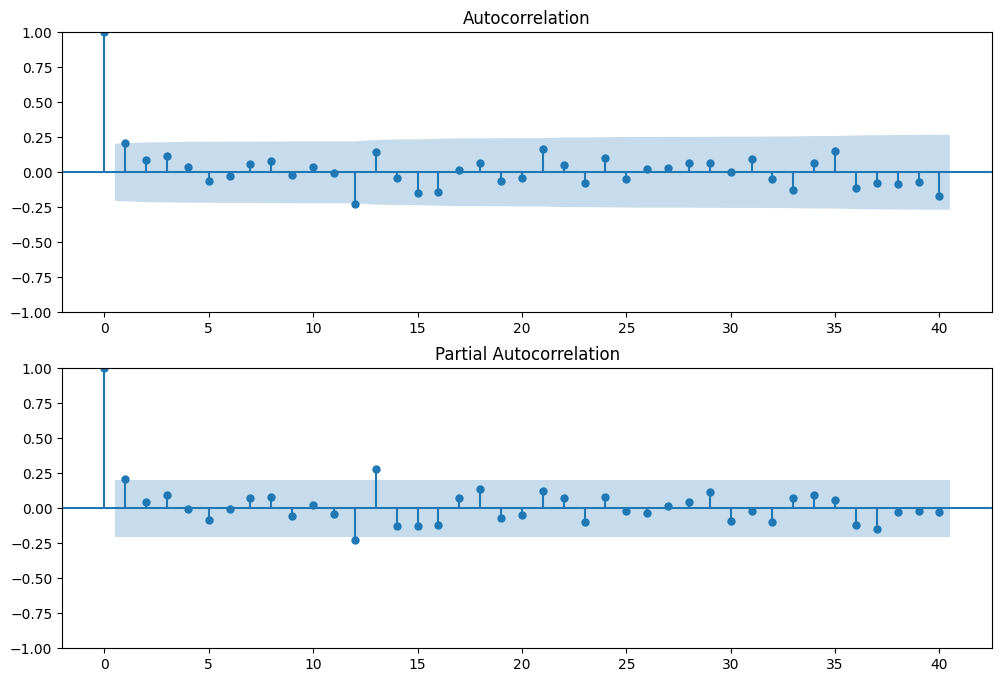

In [137]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df['Sales First Difference 12'].iloc[13:], lags=40, ax=ax1
)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df['Sales First Difference 12'].iloc[13:], lags=40, ax=ax2
)

In [138]:
from statsmodels.tsa.arima.model import ARIMA

In [139]:
df.index.freq = 'MS'
model = ARIMA(df['Sales'],order=(1,1,1),freq='MS')
model_fit = model.fit()

In [140]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 13 Feb 2024   AIC                           1911.627
Time:                        21:55:23   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

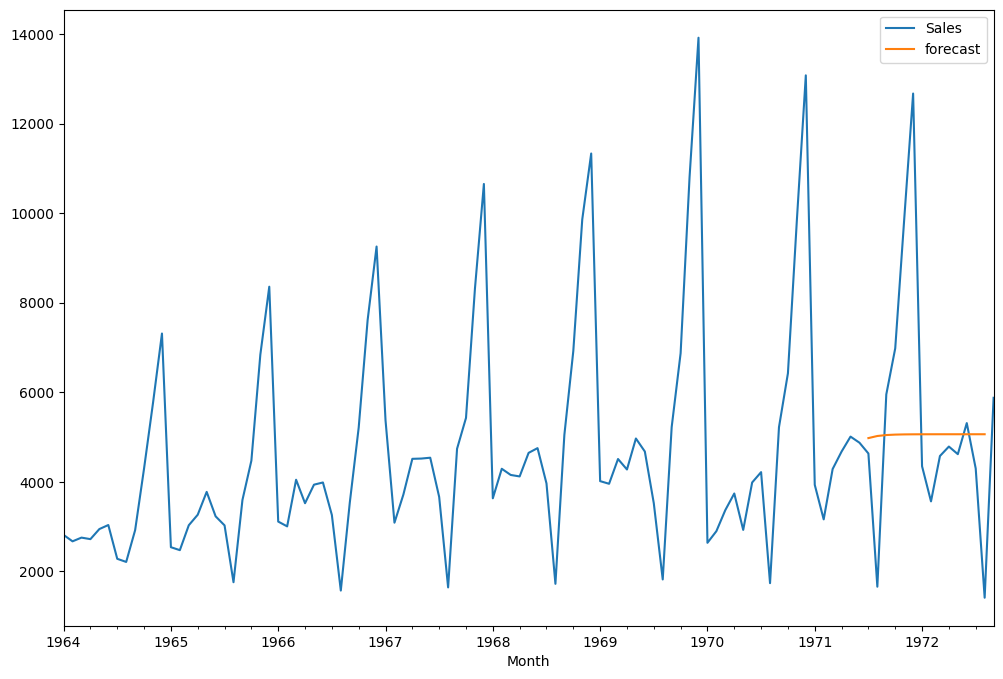

In [141]:
df["forecast"] = model_fit.predict(start=90, end=103, dynamic=True)
df[["Sales", "forecast"]].plot(figsize=(12, 8))

In [142]:
df['forecast']

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01            NaN
1964-04-01            NaN
1964-05-01            NaN
                 ...     
1972-05-01    5062.881681
1972-06-01    5062.899296
1972-07-01    5062.907302
1972-08-01    5062.910941
1972-09-01            NaN
Freq: MS, Name: forecast, Length: 105, dtype: float64

In [143]:
model = sm.tsa.statespace.SARIMAX(
    df["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), freq='MS'
)
results = model.fit()

<Axes: xlabel='Month'>

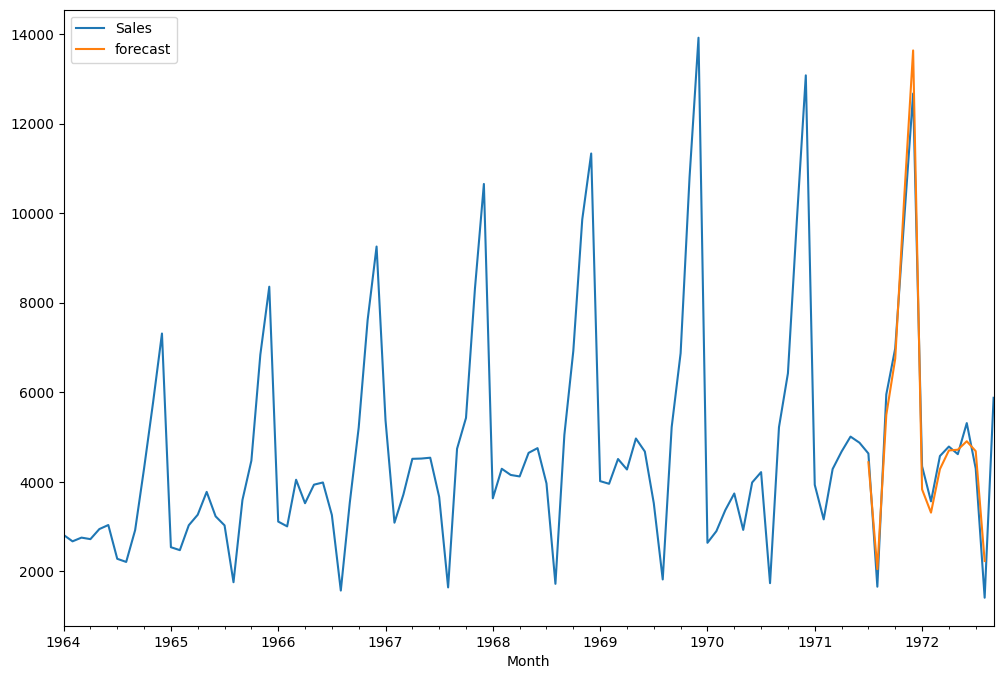

In [144]:
df["forecast"] = results.predict(start=90, end=103, dynamic=True)
df[["Sales", "forecast"]].plot(figsize=(12, 8))

In [145]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]

In [146]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [147]:
future_datest_df.tail()

,Sales,Sales First Difference,Sales First Difference 12,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [148]:
future_df = pd.concat([df, future_datest_df])

C:\Users\viboo\AppData\Local\Temp\ipykernel_18780\714450626.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df, future_datest_df])


<Axes: >

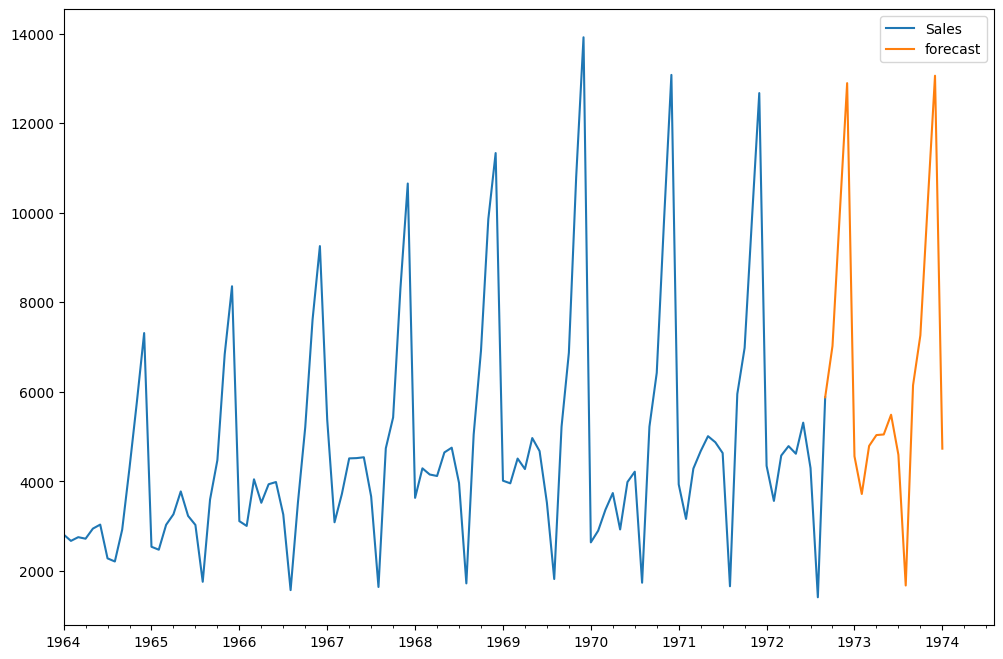

In [149]:
future_df["forecast"] = results.predict(start=104, end=120, dynamic=True)
future_df[["Sales", "forecast"]].plot(figsize=(12, 8))